In [1]:
"""
A basic example of a pack simulation consisting of two sets of 16 parallel
cells connected in series for a total of 32 cells.
"""

import liionpack as lp
import pybamm
import numpy as np
import os

lp.set_logging_level('NOTICE')

# Define parameters
Np = 16
Ns = 2
Iapp = 20

# Generate the netlist
netlist = lp.setup_circuit(Np=Np, Ns=Ns)

# Define additional output variables
output_variables = [
    'Volume-averaged cell temperature [K]']

# Define a cycling experiment using PyBaMM
experiment = pybamm.Experiment([
    f'Charge at {Iapp} A for 30 minutes',
    'Rest for 15 minutes',
    f'Discharge at {Iapp} A for 30 minutes',
    'Rest for 30 minutes'],
    period='10 seconds')

# Define the PyBaMM parameters
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)
inputs = {"Total heat transfer coefficient [W.m-2.K-1]": np.ones(Np * Ns) * 10}

# Solve the pack
output = lp.solve(netlist=netlist,
                  sim_func=lp.thermal_simulation,
                  parameter_values=parameter_values,
                  experiment=experiment,
                  output_variables=output_variables,
                  initial_soc=0.5,
                  inputs=inputs,
                  nproc=os.cpu_count(),
                  manager='casadi')

2022-02-10 21:01:24,624 - [NOTICE] netlist_utils.setup_circuit(333): Circuit created
2022-02-10 21:01:24 - [NOTICE] netlist_utils.setup_circuit(333): Circuit created
2022-02-10 21:01:24,646 - [NOTICE] solvers.check_current_function(285): Parameter: Current function [A] has been set to input
2022-02-10 21:01:24 - [NOTICE] solvers.check_current_function(285): Parameter: Current function [A] has been set to input
2022-02-10 21:01:25,476 - [NOTICE] solvers.solve(206): Starting step solve
2022-02-10 21:01:25 - [NOTICE] solvers.solve(206): Starting step solve
Stepping simulation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 631/631 [00:14<00:00, 42.50it/s]
2022-02-10 21:01:40,340 - [NOTICE] solvers.solve(258): Step solve finished
2022-02-10 21:01:40 - [NOTICE] solvers.solve(258): Step solve finished
2022-02-10 21:01:40,3

In [4]:
import matplotlib.pyplot as plt
import textwrap

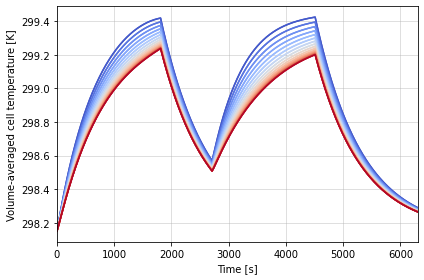

In [6]:

# Get time and results for battery cells
time = output["Time [s]"]
cell_vars = ['Volume-averaged cell temperature [K]']

context = "light"
context = lp.lp_context(context)
cmap = lp.lp_cmap(context)

# Get number of cells and setup colormap
n = output[cell_vars[0]].shape[-1]
colors = cmap(np.linspace(0, 1, n))

# Create plot figures for cell variables
fig, ax = plt.subplots(1,1,tight_layout=True)
with plt.rc_context(context):
    for j, var in enumerate(cell_vars):
        for i in range(n):
            ax.plot(time, output[var][:, i], color=colors[i])
        ax.set_xlabel("Time [s]")
        ax.set_ylabel(textwrap.fill(var, 45))
        ax.ticklabel_format(axis="y", scilimits=[-5, 5])
        ax.set_xlim([0,time[-1]])
        ax.grid(alpha=0.5)
        
    fig.savefig("../figures/thermal.pdf")